In [1]:
import control
from control.matlab import *
import numpy as np
import scipy as sc
import sympy as sy
import matplotlib.pyplot as plt

In [2]:
A = [[-5, -1],[3, -1]]
B = [[2],[5]]
C = [[1, 2]]
D = [[0]]

ss2tf(A, B, C ,D)


  12 s + 59
-------------
s^2 + 6 s + 8

In [3]:
p1 = np.array([12, 59])
p2 = np.array([1, 6, 8])
tf2ss(p1, p2)

A = [[-6. -8.]
 [ 1.  0.]]

B = [[1.]
 [0.]]

C = [[12. 59.]]

D = [[0.]]

# Traditional way (symbolic)

$$
\phi(s) = (s\mathbf{I} - \mathbf{A})^{-1}
$$
$$
H(s) = \frac{Y(s)}{U(s)} = \mathbf{C}\phi(s)\mathbf{B} + \mathbf{D}
$$

In [16]:
_A = sy.Matrix(A)
_B = sy.Matrix(B)
_C = sy.Matrix(C)
_D = sy.Matrix(D)

s, t = sy.symbols('s t')

phi = (s*sy.eye(2) - _A).inv()
print("State Transition Matrix")
phi

State Transition Matrix


Matrix([
[(s + 1)/(s**2 + 6*s + 8),  -3/(3*s**2 + 18*s + 24)],
[    -3/(-s**2 - 6*s - 8), (s + 5)/(s**2 + 6*s + 8)]])

In [17]:
_H = sy.simplify(_C*phi*_B + _D)
_H[0]

(12*s + 59)/(s**2 + 6*s + 8)

# Pregunta 3.b

In [19]:
A = [[0, 1, 0],[0, 0, 1], [-65, -73, -9]]
B = [[0], [0], [1]]
C = [[8, 1, 0]]
D = [[0]]

ss2tf(A, B, C ,D)


 1.421e-14 s^2 + s + 8
-----------------------
s^3 + 9 s^2 + 73 s + 65

In [20]:
p1 = np.array([1, 8])
p2 = np.array([1, 9, 73, 65])
tf2ss(p1, p2)

A = [[ -9. -73. -65.]
 [  1.   0.   0.]
 [  0.   1.   0.]]

B = [[1.]
 [0.]
 [0.]]

C = [[0. 1. 8.]]

D = [[0.]]

0.05714285714285714 0.06334996556501955 1.0909090909090908


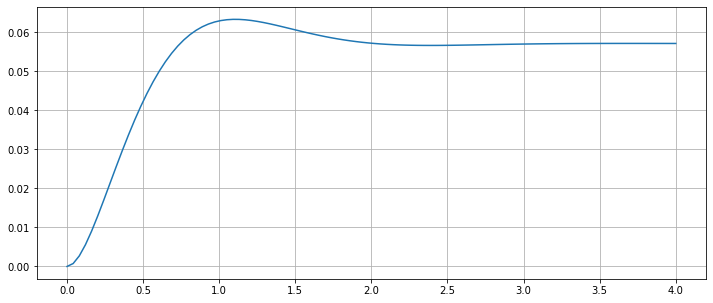

In [44]:
def f(t):
    aux = np.sqrt(6)*t
    ans = 2/35 + 3*np.exp(-7*t)/217
    ans -= (np.exp(-2*t)*(11*np.sqrt(6)*np.cos(aux)+7*np.sin(aux)))/(155*np.sqrt(6))
    return ans


l = 0; r = 4; n = 100;
_t = np.linspace(0,4,100)

plt.figure(figsize=(12,5))
plt.plot(_t, f(_t))
plt.grid()

maxi = np.max(f(_t))
posi = np.argmax(f(_t))

print(f(100), maxi, l+posi*(r-l)/(n-1))

In [89]:
print(f(0.628))

0.05140827065221175
